# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

## Importing all the necessary Libraries

In [1]:
import pandas as pd
from fbprophet import Prophet
import plotly.express as px

In [2]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab' 

## Importing the Dataset & Exploring it

In [3]:
!pip install yfinance

In [4]:
from pandas.core.frame import DataFrame
import yfinance as yahooFinance
 
df = yahooFinance.Ticker("TSLA").history(period = '1y')

In [5]:
print(df)

                   Open         High  ...  Dividends  Stock Splits
Date                                  ...                         
2021-01-26   891.380005   895.900024  ...          0             0
2021-01-27   870.349976   891.500000  ...          0             0
2021-01-28   820.000000   848.000000  ...          0             0
2021-01-29   830.000000   842.409973  ...          0             0
2021-02-01   814.289978   842.000000  ...          0             0
...                 ...          ...  ...        ...           ...
2022-01-19  1041.709961  1054.670044  ...          0             0
2022-01-20  1009.729980  1041.660034  ...          0             0
2022-01-21   996.340027  1004.549988  ...          0             0
2022-01-24   904.760010   933.510010  ...          0             0
2022-01-25   914.200012   951.260010  ...          0             0

[253 rows x 7 columns]


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
#read_csv function from pandas
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-26,891.380005,895.900024,871.599976,883.090027,23131600,0,0
2021-01-27,870.349976,891.500000,858.659973,864.159973,27334000,0,0
2021-01-28,820.000000,848.000000,801.000000,835.429993,26378000,0,0
2021-01-29,830.000000,842.409973,780.099976,793.530029,34990800,0,0
2021-02-01,814.289978,842.000000,795.559998,839.809998,25391400,0,0


In [8]:
df.reset_index(level=0, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          253 non-null    datetime64[ns]
 1   Open          253 non-null    float64       
 2   High          253 non-null    float64       
 3   Low           253 non-null    float64       
 4   Close         253 non-null    float64       
 5   Volume        253 non-null    int64         
 6   Dividends     253 non-null    int64         
 7   Stock Splits  253 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 15.9 KB


In [10]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.0,253.0
mean,794.509882,810.934227,775.911424,793.841303,2.680693e+07,0.0,0.0
std,173.873605,179.484763,167.232484,173.528167,1.128733e+07,0.0,0.0
min,552.549988,566.210022,539.489990,563.000000,9.800600e+06,0.0,0.0
25%,670.000000,684.000000,652.000000,668.059998,1.882670e+07,0.0,0.0
50%,726.150024,740.969971,712.729980,730.909973,2.456090e+07,0.0,0.0
75%,904.760010,921.690002,886.119995,909.679993,3.144540e+07,0.0,0.0
max,1234.410034,1243.489990,1217.000000,1229.910034,8.939650e+07,0.0,0.0


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [11]:
px.area(df, x='Date', y="Close")

In [12]:
px.line(df, x='Date', y="Close")

In [13]:
px.area(df, x='Date', y="Volume")

In [14]:
px.bar(df, y = 'Volume')

In [15]:
px.box(df, y ='Close')

# Understanding Facebook Prophet

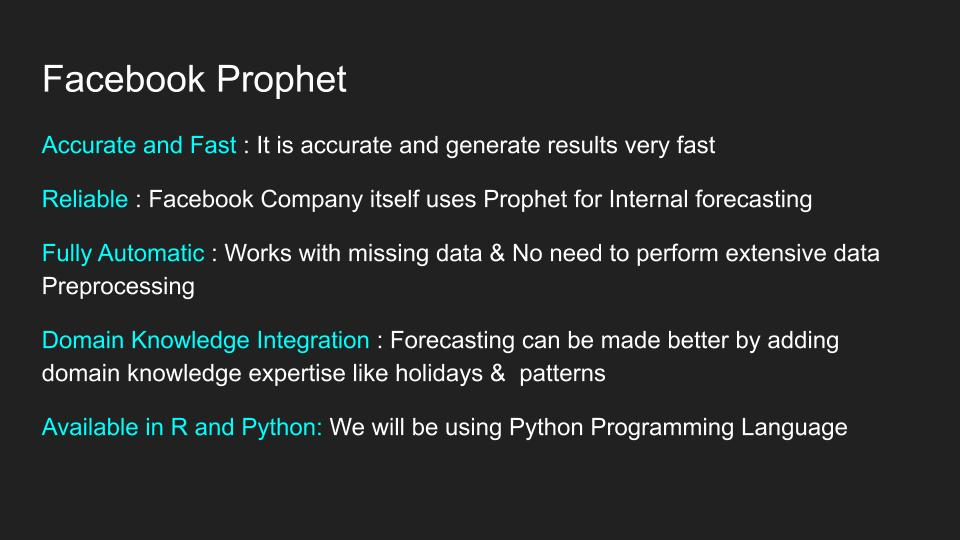

## Data Preperation

In [16]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-26,891.380005,895.900024,871.599976,883.090027,23131600,0,0
1,2021-01-27,870.349976,891.500000,858.659973,864.159973,27334000,0,0
2,2021-01-28,820.000000,848.000000,801.000000,835.429993,26378000,0,0
3,2021-01-29,830.000000,842.409973,780.099976,793.530029,34990800,0,0
4,2021-02-01,814.289978,842.000000,795.559998,839.809998,25391400,0,0
...,...,...,...,...,...,...,...,...
248,2022-01-19,1041.709961,1054.670044,995.000000,995.650024,25147500,0,0
249,2022-01-20,1009.729980,1041.660034,994.000000,996.270020,23496200,0,0
250,2022-01-21,996.340027,1004.549988,940.500000,943.900024,34126500,0,0
251,2022-01-24,904.760010,933.510010,851.469971,930.000000,50791700,0,0


In [17]:
columns = ['Date', 'Close']
df_new = pd.DataFrame(df, columns = columns)

In [18]:
df_new

,Date,Close
0,2021-01-26,883.090027
1,2021-01-27,864.159973
2,2021-01-28,835.429993
3,2021-01-29,793.530029
4,2021-02-01,839.809998
...,...,...
248,2022-01-19,995.650024
249,2022-01-20,996.270020
250,2022-01-21,943.900024
251,2022-01-24,930.000000


In [19]:
df_new.columns = ['ds', 'y']
prophet_df = df_new.copy()

In [20]:
prophet_df

,ds,y
0,2021-01-26,883.090027
1,2021-01-27,864.159973
2,2021-01-28,835.429993
3,2021-01-29,793.530029
4,2021-02-01,839.809998
...,...,...
248,2022-01-19,995.650024
249,2022-01-20,996.270020
250,2022-01-21,943.900024
251,2022-01-24,930.000000


## Creating Facebook Prophet Model

In [21]:
model = Prophet()
model.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [22]:
future = model.make_future_dataframe(periods = 30)
forecast = model.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-26,815.739614,724.015114,881.651857,815.739614,815.739614,-12.394798,-12.394798,-12.394798,-12.394798,-12.394798,-12.394798,0.0,0.0,0.0,803.344817
1,2021-01-27,813.782432,720.279032,885.484372,813.782432,813.782432,-8.989575,-8.989575,-8.989575,-8.989575,-8.989575,-8.989575,0.0,0.0,0.0,804.792857
2,2021-01-28,811.825251,714.342397,875.036535,811.825251,811.825251,-15.225839,-15.225839,-15.225839,-15.225839,-15.225839,-15.225839,0.0,0.0,0.0,796.599412
3,2021-01-29,809.868069,714.095023,873.376601,809.868069,809.868069,-16.559358,-16.559358,-16.559358,-16.559358,-16.559358,-16.559358,0.0,0.0,0.0,793.308711
4,2021-02-01,803.996524,714.598628,868.831405,803.996524,803.996524,-10.735616,-10.735616,-10.735616,-10.735616,-10.735616,-10.735616,0.0,0.0,0.0,793.260907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2022-02-20,1087.304932,1038.161040,1207.311363,1075.534719,1099.572388,31.952593,31.952593,31.952593,31.952593,31.952593,31.952593,0.0,0.0,0.0,1119.257525
279,2022-02-21,1087.827334,991.761582,1158.674429,1075.178840,1100.809432,-10.735616,-10.735616,-10.735616,-10.735616,-10.735616,-10.735616,0.0,0.0,0.0,1077.091718
280,2022-02-22,1088.349736,993.461235,1154.273044,1074.864498,1102.314121,-12.394798,-12.394798,-12.394798,-12.394798,-12.394798,-12.394798,0.0,0.0,0.0,1075.954939
281,2022-02-23,1088.872138,1002.207132,1163.358110,1074.214005,1103.668429,-8.989575,-8.989575,-8.989575,-8.989575,-8.989575,-8.989575,0.0,0.0,0.0,1079.882563


In [24]:
px.line(forecast, x ='ds', y ='yhat')

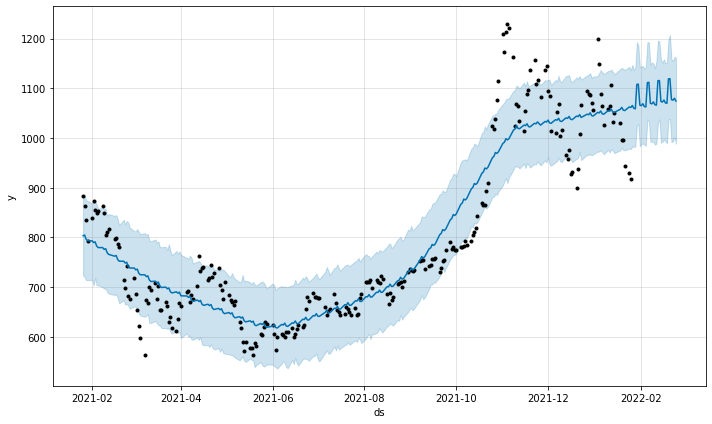

In [25]:
figure = model.plot(forecast, xlabel = 'ds', ylabel = 'y')

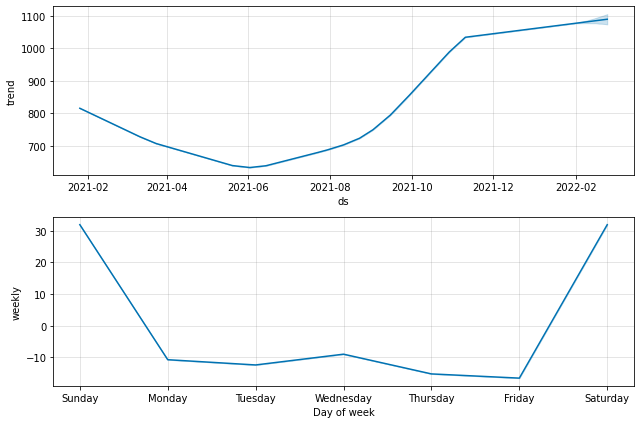

In [26]:
figure2 = model.plot_components(forecast)

##Downloading the Forecast data

In [27]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>